In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [3]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
data.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [5]:
data.shape

(940, 15)

In [6]:
data.columns.tolist()

['Id',
 'ActivityDate',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'SedentaryActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

In [7]:
data.duplicated().sum()

0

In [8]:
data.duplicated(['Id', 'Calories']).sum()

66

In [9]:
data['Id'].nunique()

33

In [10]:
data['Id'].duplicated().sum()

907

In [11]:
cols = ['Id','ActivityDate','TotalSteps','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']
df = data[cols]

In [12]:
df.head()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863


In [13]:
df.rename(columns={'ActivityDate':'Date'},inplace=True)
df.head()

/tmp/ipykernel_18/3811579750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'ActivityDate':'Date'},inplace=True)


,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,25,13,328,728,1985
1,1503960366,4/13/2016,10735,21,19,217,776,1797
2,1503960366,4/14/2016,10460,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,29,34,209,726,1745
4,1503960366,4/16/2016,12669,36,10,221,773,1863


In [14]:
df['TotalMinutes'] = df.VeryActiveMinutes + df.FairlyActiveMinutes + df.LightlyActiveMinutes + df.SedentaryMinutes
df.head()

/tmp/ipykernel_18/1387485318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalMinutes'] = df.VeryActiveMinutes + df.FairlyActiveMinutes + df.LightlyActiveMinutes + df.SedentaryMinutes


,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040


In [15]:
df['TotalHours'] = round(df['TotalMinutes'] / 60)
df.head()

/tmp/ipykernel_18/781961385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalHours'] = round(df['TotalMinutes'] / 60)


,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
0,1503960366,4/12/2016,13162,25,13,328,728,1985,1094,18.0
1,1503960366,4/13/2016,10735,21,19,217,776,1797,1033,17.0
2,1503960366,4/14/2016,10460,30,11,181,1218,1776,1440,24.0
3,1503960366,4/15/2016,9762,29,34,209,726,1745,998,17.0
4,1503960366,4/16/2016,12669,36,10,221,773,1863,1040,17.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    940 non-null    int64  
 1   Date                  940 non-null    object 
 2   TotalSteps            940 non-null    int64  
 3   VeryActiveMinutes     940 non-null    int64  
 4   FairlyActiveMinutes   940 non-null    int64  
 5   LightlyActiveMinutes  940 non-null    int64  
 6   SedentaryMinutes      940 non-null    int64  
 7   Calories              940 non-null    int64  
 8   TotalMinutes          940 non-null    int64  
 9   TotalHours            940 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 73.6+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_18/2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   Date                  940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
 8   TotalMinutes          940 non-null    int64         
 9   TotalHours            940 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 73.6 KB


In [19]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

/tmp/ipykernel_18/3625706837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Date'].dt.day_name()


,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayOfWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18.0,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17.0,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24.0,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,17.0,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17.0,Saturday


In [20]:
df.isnull().sum()

Id                      0
Date                    0
TotalSteps              0
VeryActiveMinutes       0
FairlyActiveMinutes     0
LightlyActiveMinutes    0
SedentaryMinutes        0
Calories                0
TotalMinutes            0
TotalHours              0
DayOfWeek               0
dtype: int64

In [21]:
df.describe()

,Id,Date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283


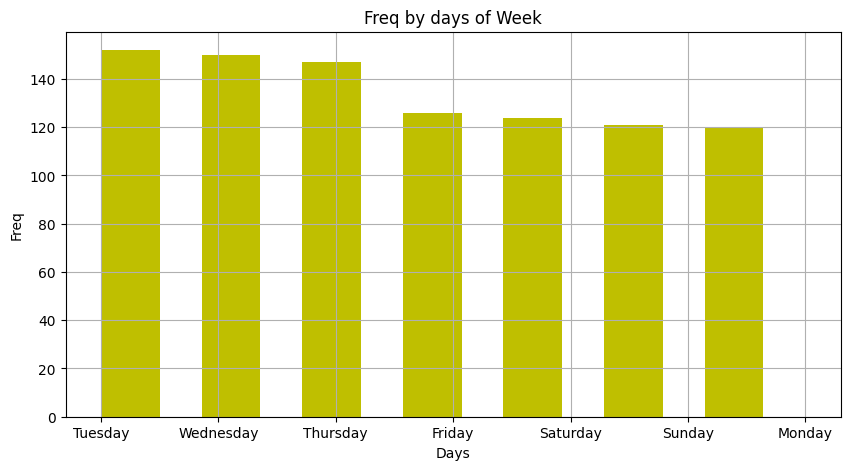

In [22]:
plt.figure(figsize=(10,5))
plt.hist(df['DayOfWeek'], bins= 7 , color= 'y', width=0.5)
plt.grid()
plt.title('Freq by days of Week')
plt.xlabel('Days')
plt.ylabel('Freq')
plt.show()

In [23]:
df.drop(['DayOfWeek','Date'],axis=1, inplace=True)

/tmp/ipykernel_18/450219883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['DayOfWeek','Date'],axis=1, inplace=True)


In [24]:
df.corr()

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
Id,1.000000,0.185721,0.303608,0.051158,-0.098754,-0.043319,0.396671,-0.048274,-0.048140
TotalSteps,0.185721,1.000000,0.667079,0.498693,0.569600,-0.327484,0.591568,-0.017285,-0.018152
VeryActiveMinutes,0.303608,0.667079,1.000000,0.312420,0.051926,-0.164671,0.615838,-0.018244,-0.021064
FairlyActiveMinutes,0.051158,0.498693,0.312420,1.000000,0.148820,-0.237446,0.297623,-0.094155,-0.094941
LightlyActiveMinutes,-0.098754,0.569600,0.051926,0.148820,1.000000,-0.437104,0.286718,-0.067049,-0.066640
SedentaryMinutes,-0.043319,-0.327484,-0.164671,-0.237446,-0.437104,1.000000,-0.106973,0.915243,0.914539
Calories,0.396671,0.591568,0.615838,0.297623,0.286718,-0.106973,1.000000,0.094951,0.093314
TotalMinutes,-0.048274,-0.017285,-0.018244,-0.094155,-0.067049,0.915243,0.094951,1.000000,0.998963
TotalHours,-0.048140,-0.018152,-0.021064,-0.094941,-0.066640,0.914539,0.093314,0.998963,1.000000


<Axes: >

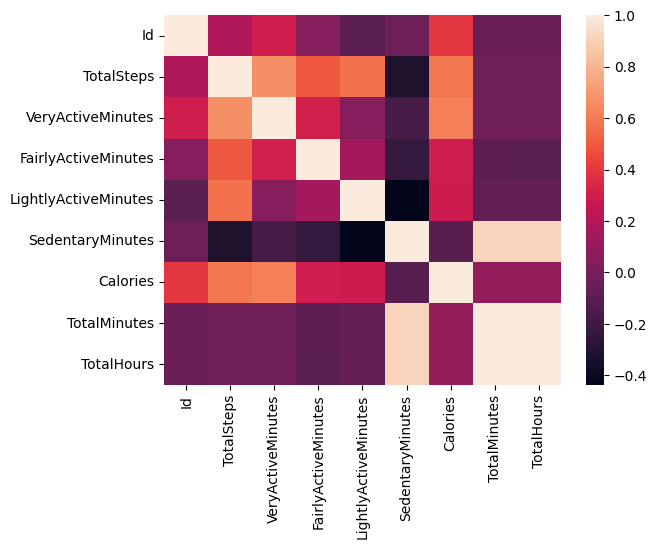

In [25]:
sns.heatmap(df.corr())

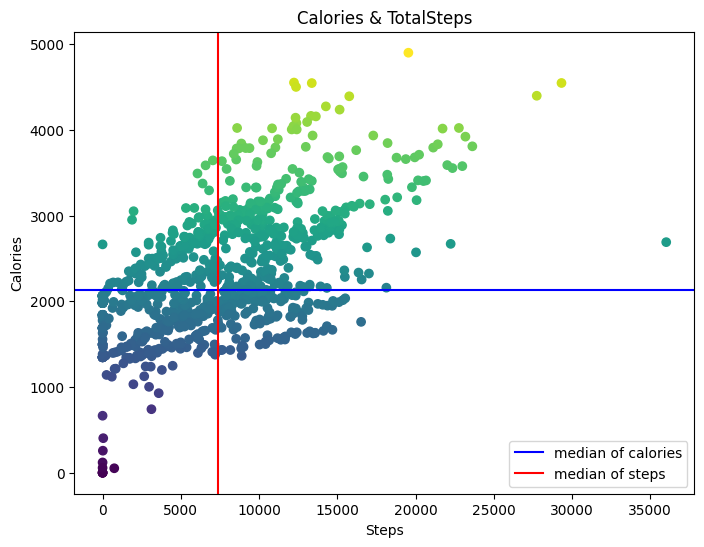

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(df['TotalSteps'] ,df['Calories'], c=df['Calories'])

median_steps = 7405
median_calories = 2134

plt.axhline(median_calories, color = 'b', label = 'median of calories')
plt.axvline(median_steps, color = 'r', label = 'median of steps')

plt.xlabel('Steps')
plt.ylabel('Calories')
plt.title('Calories & TotalSteps')

plt.legend()
plt.show()

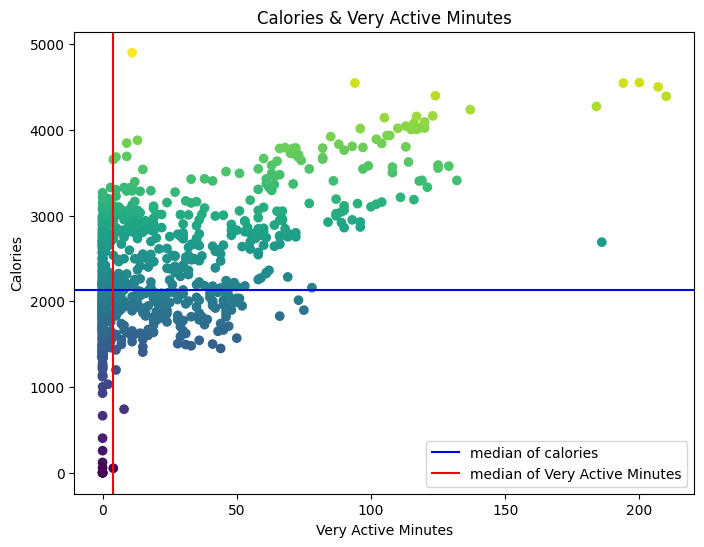

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(df['VeryActiveMinutes'] ,df['Calories'], c=df['Calories'])

median_activeMinutes = 4
median_calories = 2134

plt.axhline(median_calories, color = 'b', label = 'median of calories')
plt.axvline(median_activeMinutes, color = 'r', label = 'median of Very Active Minutes')

plt.xlabel('Very Active Minutes')
plt.ylabel('Calories')
plt.title('Calories & Very Active Minutes')

plt.legend()
plt.show()

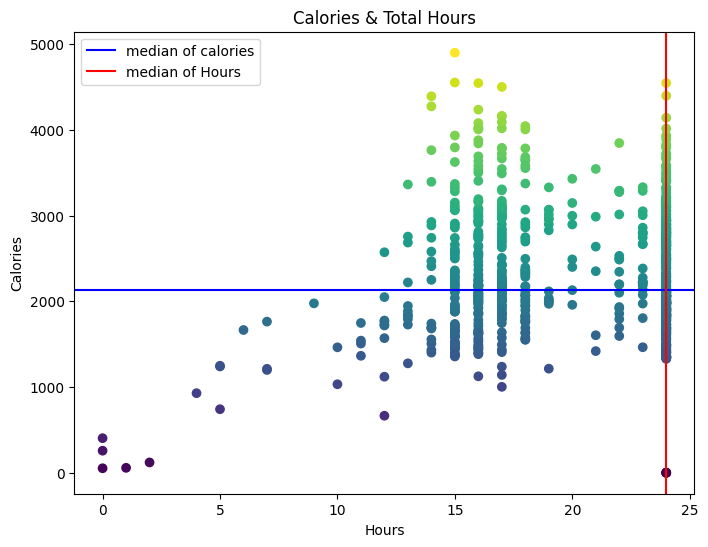

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['TotalHours'] ,df['Calories'], c=df['Calories'])

median_Hours = 24
median_calories = 2134

plt.axhline(median_calories,color = 'b',label = 'median of calories')
plt.axvline(median_Hours,color = 'r',label = 'median of Hours')

plt.xlabel('Hours')
plt.ylabel('Calories')
plt.title('Calories & Total Hours')

plt.legend()
plt.show()

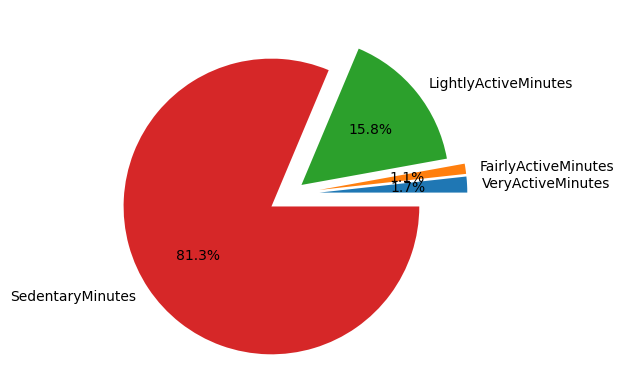

In [29]:
minutes = [df['VeryActiveMinutes'].sum(),df['FairlyActiveMinutes'].sum(),df['LightlyActiveMinutes'].sum(),df['SedentaryMinutes'].sum()]
labels = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

plt.pie( minutes, labels=labels, autopct='%1.1f%%', explode=[0.2,0.2,0.1,0.15])

plt.show()